# db

['성산리','오조리','시흥리','고성리','신양리','수산1리','수산2리','수산리',
 '난산리','신산리','삼달1리','삼달2리','삼달리','신풍리','신천리',
 '성산포','성산일출봉','성산일출해양도립공원','두모악','신양해수욕장',
 '신양섭지코지해변','섭지코지','광치기해변','혼인지','일출랜드',
 '멍에승마장','이어도 승마장','우리승마장','신풍항','삼달항',
 '온평중동항','신양동항','오조항','시흥항','성산항','동남초','성산초',
 '수산초','시흥초','신산초','온평초','풍천초','성산중','신산중','성산고']


In [1]:
import psycopg2

connect_db = "host ='SOMETHING' dbname = 'DATABASE'user = 'SYCHOI' password='PW'"
conn = psycopg2.connect(connect_db)
cur = conn.cursor()


In [2]:
cur.execute("select * from tb_card_detail where dong = '우도면' or dong ='성산읍';")

result = cur.fetchall()

import pandas as pd
sscard = pd.DataFrame(result)
sscard.columns =[desc[0] for desc in cur.description]

sscard.head()

,index,base_year_month,city,dong,grid_id,biz_type,user_type,age,sex,use_amount
0,1,201903,서귀포시,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,20,남성,65000.00
1,2,201903,서귀포시,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,20,여성,35000.00
2,3,201903,서귀포시,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,30,남성,95000.00
3,4,201903,서귀포시,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,30,여성,190000.00
4,5,201903,서귀포시,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,40,남성,205000.00


# SSCARD

## 전처리

In [3]:
sscard.drop(['index','city'],axis=1,inplace =True)

sscard['base_year_month']= sscard['base_year_month']
sscard.rename(columns={'base_year_month':'month'},inplace=True)
sscard['dong']= sscard['dong'].astype('string')
# sscard['grid_id']= sscard['grid_id'].astype('object')
sscard['biz_type']= sscard['biz_type'].astype('string')
sscard['user_type'] = sscard['user_type'].astype('string')
sscard['sex'] = sscard['sex'].astype('string')
sscard['use_amount']= sscard['use_amount'].astype('int')


In [4]:
sscard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20102 entries, 0 to 20101
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       20102 non-null  object
 1   dong        20102 non-null  string
 2   grid_id     20102 non-null  object
 3   biz_type    20102 non-null  string
 4   user_type   20102 non-null  string
 5   age         20102 non-null  object
 6   sex         20102 non-null  string
 7   use_amount  20102 non-null  int32 
dtypes: int32(1), object(3), string(4)
memory usage: 1.2+ MB


In [5]:
sscard.loc[sscard['user_type'] == '법인', 'age'] = '법인'

sscard.loc[sscard['user_type'] == '법인', 'sex'] = '법인'

In [6]:
# 금액 천원단위로 맞춰주기 

sscard['use_amount'] = sscard['use_amount'] *0.0001

In [7]:
sscard.to_csv('./sscard.csv',encoding = 'utf-8',index=False)

In [8]:
sscard['biz_type'].value_counts()

한식 음식점업                    6713
서양식 음식점업                   3860
여관업                        1818
비알콜 음료점업                   1757
중식 음식점업                    1572
빵 및 과자류 소매업                1105
피자, 햄버거, 샌드위치 및 유사 음식점업    1070
일식 음식점업                     838
기타 외국식 음식점업                 303
기타 주점업                      269
일반유흥 주점업                    246
그외 기타 스포츠시설 운영업             173
휴양콘도 운영업                    167
그외 기타 분류안된 오락관련 서비스업         89
호텔업                          66
그외 기타 종합 소매업                 36
기타 수상오락 서비스업                 20
Name: biz_type, dtype: Int64

## EDA

In [9]:
#총 사용금액합계 
total = sscard['use_amount'].sum(axis = 0)

In [10]:
# 유저별 사용 비율 보기
a = pd.DataFrame(sscard.groupby('user_type').sum()['use_amount'])
a =a.reset_index().rename(columns={'index':'user_type'})
a = a.sort_values(by = ['use_amount'],axis=0,ascending = False)
a

,user_type,use_amount
1,내국인,1.063732e+06
3,법인,3.995051e+05
5,제주도민,2.821737e+05
6,중국,1.329610e+03
0,기타외국,7.677110e+02
2,동남아,1.322400e+02
4,일본,1.170400e+02


In [11]:
import matplotlib
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


matplotlib.rcParams['axes.unicode_minus'] = False   

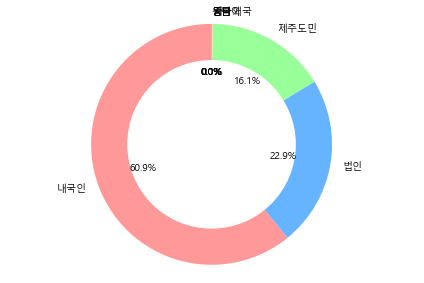

In [12]:
import matplotlib.pyplot as plt
labels = a['user_type']
sizes = a['use_amount']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#1cd2bd','#d29400','#d294e8']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [13]:
dropindex=[0,2,4,6]

b = a.drop(dropindex)

In [14]:
b

,user_type,use_amount
1,내국인,1.063732e+06
3,법인,3.995051e+05
5,제주도민,2.821737e+05


In [15]:
sscard[sscard['user_type']=='법인'].describe()

,use_amount
count,1176.000000
mean,339.715228
std,1073.140659
min,0.300000
25%,17.562500
50%,53.480000
75%,210.725000
max,14500.000000


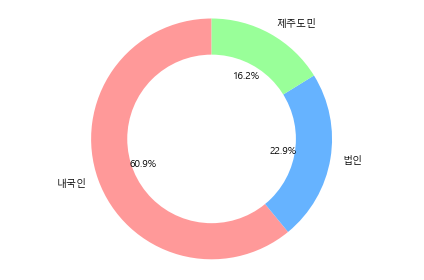

In [16]:
import matplotlib.pyplot as plt
labels = b['user_type']
sizes = b['use_amount']
colors = ['#ff9999','#66b3ff','#99ff99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [17]:
c = b.drop(index = 3)
c

,user_type,use_amount
1,내국인,1.063732e+06
5,제주도민,2.821737e+05


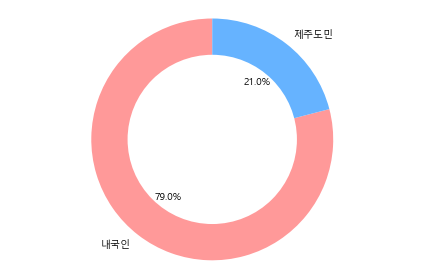

In [18]:
import matplotlib.pyplot as plt
labels = c['user_type']
sizes = c['use_amount']
colors = ['#ff9999','#66b3ff','#99ff99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

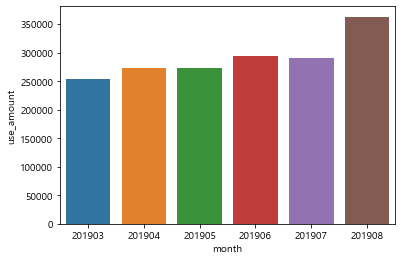

In [19]:
#월별 사용금액 
grouped = sscard.groupby('month')
a =pd.DataFrame(grouped.sum()['use_amount'])
a

a = a.reset_index().rename(columns={'index':'month'})
grouped_s = sscard.groupby('month')
a_s =pd.DataFrame(grouped_s.sum()['use_amount'])
a_s

a_s = a_s.reset_index().rename(columns={'index':'month'})

#사용금액 합계 
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = a, x = 'month',y='use_amount')


# 법인 

In [363]:
company = sscard[sscard['user_type'].apply(lambda x: any(i in x for i in ['법인']))]
company

,month,dong,grid_id,biz_type,user_type,age,sex,use_amount
12,201903,성산읍,10004323688,그외 기타 스포츠시설 운영업,법인,법인,법인,31.00
28,201903,성산읍,10004323690,한식 음식점업,법인,법인,법인,319.30
42,201903,성산읍,10004323788,한식 음식점업,법인,법인,법인,36.00
51,201903,성산읍,10004323791,그외 기타 스포츠시설 운영업,법인,법인,법인,13.00
58,201903,성산읍,10004323791,서양식 음식점업,법인,법인,법인,13.25
...,...,...,...,...,...,...,...,...
20032,201908,우도면,10004335001,서양식 음식점업,법인,법인,법인,31.55
20041,201908,우도면,10004335001,여관업,법인,법인,법인,24.00
20053,201908,우도면,10004335001,한식 음식점업,법인,법인,법인,92.60
20072,201908,우도면,10004335002,서양식 음식점업,법인,법인,법인,25.80


In [371]:
monthdrop = company[(company['month'] == '201903')|(company['month'] == '201904')].index

company.drop(monthdrop,inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [373]:
a = company.groupby('biz_type').sum()['use_amount']

In [374]:
a = pd.DataFrame(a)
a = a.sort_values(by = 'use_amount',ascending = False)
a.reset_index

,use_amount
biz_type,
한식 음식점업,145086.5162
휴양콘도 운영업,46113.0000
여관업,37675.6323
일식 음식점업,8550.0610
비알콜 음료점업,7283.8444
일반유흥 주점업,7215.8500
중식 음식점업,6693.3350
서양식 음식점업,6497.4330
빵 및 과자류 소매업,4839.9690


In [ ]:
import matplotlib.pyplot as plt
labels = b['age']
sizes = b['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','wheat','gold','darksalmon','darkkhaki','y','pink']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

# CARD

- 내국인 + 도민
- 가설 
    - 외국인은 현금사용비율이 높고 , 일반 관광객과 루트가 다르다?
        - 소수의 데이터로 일반화될 가능성 ↑
    - 법인이 사용금액 은 높지만 법인은 실용성에 의해 움직인다는 가설
    

- 8월을 제외하고 크게 변화가 없다 
    - 3월 4월 드랍



In [20]:
card = sscard.copy()

In [21]:
card[(card['month'] == '201903')|(card['month'] == '201904')]

,month,dong,grid_id,biz_type,user_type,age,sex,use_amount
0,201903,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,20,남성,6.5
1,201903,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,20,여성,3.5
2,201903,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,30,남성,9.5
3,201903,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,30,여성,19.0
4,201903,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,40,남성,20.5
...,...,...,...,...,...,...,...,...
16836,201904,우도면,10004335002,한식 음식점업,제주도민,40,여성,3.2
16837,201904,우도면,10004335002,한식 음식점업,제주도민,50,남성,157.4
16838,201904,우도면,10004335002,한식 음식점업,제주도민,50,여성,21.3
16839,201904,우도면,10004335002,한식 음식점업,제주도민,60,남성,20.1


In [22]:
# 3 4월 drop하기 4862

# card = sscard[sscard['month']]
# card = sscard[(sscard['month'] == '201905')|(sscard['month'] == '201906')|(sscard['month'] == '201907')|(sscard['month'] == '201908')]

monthdrop = card[(card['month'] == '201903')|(card['month'] == '201904')].index

card.drop(monthdrop,inplace = True)

In [23]:
card['month'].value_counts()

201908    3601
201907    3460
201906    3391
201905    3347
Name: month, dtype: int64

In [24]:
card = card[(card['user_type'] == '내국인')|(card['user_type'] == '제주도민')]

In [25]:
card_final = card.copy()

In [26]:
card_final['month'].unique()

array(['201905', '201906', '201907', '201908'], dtype=object)

In [27]:
card_final['month'].value_counts()

201908    3359
201907    3221
201906    3165
201905    3131
Name: month, dtype: int64

In [28]:
card_final.head()

,month,dong,grid_id,biz_type,user_type,age,sex,use_amount
4862,201905,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,20,남성,3.5
4863,201905,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,20,여성,6.0
4864,201905,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,30,남성,13.5
4865,201905,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,30,여성,34.5
4866,201905,성산읍,10004323688,그외 기타 스포츠시설 운영업,내국인,40,남성,65.5


In [29]:
card.isnull().sum()

month         0
dong          0
grid_id       0
biz_type      0
user_type     0
age           0
sex           0
use_amount    0
dtype: int64

In [30]:
card['age'].unique()

array(['20', '30', '40', '50', '60', '70', '10', 'NA'], dtype=object)

## card_grid

In [31]:
#grid별 카드 사용액 총합 순위
card_grid = pd.DataFrame(card.groupby('grid_id').sum()['use_amount'])
card_grid = card_grid.reset_index().rename({'index':'grid_id'})
card_grid = card_grid.sort_values(by = 'use_amount',ascending = False)

In [32]:
card_grid

,grid_id,use_amount
55,10004324595,240873.6505
64,10004324796,122899.3670
59,10004324693,90031.0621
65,10004324797,63235.7823
72,10004334902,35185.1789
...,...,...
27,10004324189,41.7500
18,10004324083,32.7500
63,10004324793,24.6600
49,10004324498,20.9500


In [33]:
card_grid.describe()

,use_amount
count,77.000000
mean,12187.642248
std,32842.128005
min,11.000000
25%,450.900000
50%,2450.800000
75%,7545.500000
max,240873.650500


In [34]:
# 카드 사용금액 그리드 모두 
card_grid.to_csv('card_grid.csv',encoding = 'utf-8',index=False)

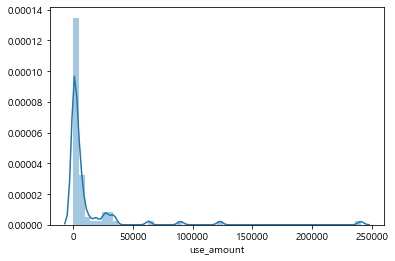

In [35]:
ax1 = sns.distplot(card_grid['use_amount'])

## card_25
- 상위 25% 

In [36]:
dropindex_card = card_grid[card_grid['use_amount'] < 7545.500000].index

card_25 = card_grid.drop(index = dropindex_card)
card_25


,grid_id,use_amount
55,10004324595,240873.6505
64,10004324796,122899.3670
59,10004324693,90031.0621
65,10004324797,63235.7823
72,10004334902,35185.1789
61,10004324695,33255.3431
57,10004324597,32634.6290
62,10004324697,29084.8310
60,10004324694,27296.4440
53,10004324593,26745.8216


In [37]:
card_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 55 to 42
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grid_id     20 non-null     object 
 1   use_amount  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [38]:
dropindex_card = card_grid[card_grid['use_amount'] < 7545.500000].grid_id
# dropindex_card

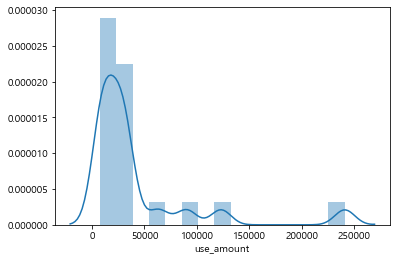

In [39]:
ax2 = sns.distplot(card_25['use_amount'])

In [40]:
card_25

,grid_id,use_amount
55,10004324595,240873.6505
64,10004324796,122899.3670
59,10004324693,90031.0621
65,10004324797,63235.7823
72,10004334902,35185.1789
61,10004324695,33255.3431
57,10004324597,32634.6290
62,10004324697,29084.8310
60,10004324694,27296.4440
53,10004324593,26745.8216


In [41]:
card_25.describe()

,use_amount
count,20.000000
mean,41571.730200
std,55447.975338
min,7545.500000
25%,11810.976600
50%,25896.098300
75%,33737.802050
max,240873.650500


In [42]:
card_25['grid_id']

55    10004324595
64    10004324796
59    10004324693
65    10004324797
72    10004334902
61    10004324695
57    10004324597
62    10004324697
60    10004324694
53    10004324593
67    10004334801
54    10004324594
74    10004335000
56    10004324596
58    10004324598
69    10004334803
31    10004324287
66    10004334800
48    10004324497
42    10004324490
Name: grid_id, dtype: object

In [43]:
card_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 55 to 42
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grid_id     20 non-null     object 
 1   use_amount  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [44]:
card_25['use_amount']= card_25['use_amount'].astype('int32')
# card_25['grid_id']= card_25['grid_id'].astype('object')

In [45]:
card_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 55 to 42
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   grid_id     20 non-null     object
 1   use_amount  20 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 400.0+ bytes


In [46]:
# 카드 사용금액 그리드별 상위 25% 
card_25.to_csv('card_25__.csv',encoding = 'utf-8',index=False)

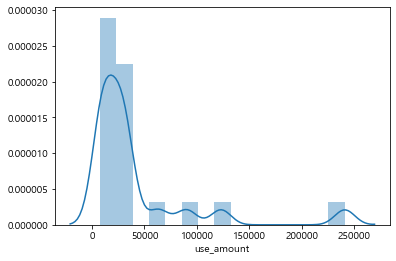

In [47]:
ax = sns.distplot(card_25['use_amount'])

55    10004324595
64    10004324796
59    10004324693
65    10004324797
61    10004324695
57    10004324597
62    10004324697
60    10004324694
53    10004324593
54    10004324594
56    10004324596
58    10004324598
31    10004324287
48    10004324497
42    10004324490
39    10004324394
43    10004324491

## card_final
- 우도 + 성산읍
    - 55    10004324595
    - 64    10004324796
    - 59    10004324693
    - 65    10004324797
    - 72    10004334902
    - 61    10004324695
    - 57    10004324597
    - 62    10004324697
    - 60    10004324694
    - 53    10004324593
    - 67    10004334801
    - 54    10004324594
    - 74    10004335000
    - 56    10004324596
    - 58    10004324598
    - 69    10004334803
    - 31    10004324287
    - 66    10004334800
    - 48    10004324497
    - 42    10004324490


- 성산읍만

    -    55    10004324595
    -    64    10004324796
    -    59    10004324693
    -    65    10004324797
    -    61    10004324695
    -    57    10004324597
    -    62    10004324697
    -    60    10004324694
    -    53    10004324593
    -    54    10004324594
    -    56    10004324596
    -    58    10004324598
    -   31    10004324287
    -   48    10004324497
    -    42    10004324490
    -    39    10004324394
    -    43    10004324491

In [48]:
for i in dropindex_card:
    dd = card_final[card_final['grid_id'] == i].index
    card_final.drop(dd, inplace=True)

In [49]:
card_final['user_type'].unique()


<StringArray>
['내국인', '제주도민']
Length: 2, dtype: string

In [50]:
card_final 

,month,dong,grid_id,biz_type,user_type,age,sex,use_amount
5456,201905,성산읍,10004324287,서양식 음식점업,내국인,10,남성,1.50
5457,201905,성산읍,10004324287,서양식 음식점업,내국인,20,남성,21.75
5458,201905,성산읍,10004324287,서양식 음식점업,내국인,20,여성,20.23
5459,201905,성산읍,10004324287,서양식 음식점업,내국인,30,남성,27.75
5460,201905,성산읍,10004324287,서양식 음식점업,내국인,30,여성,33.51
...,...,...,...,...,...,...,...,...
20002,201908,우도면,10004335000,한식 음식점업,제주도민,40,여성,29.05
20003,201908,우도면,10004335000,한식 음식점업,제주도민,50,남성,16.23
20004,201908,우도면,10004335000,한식 음식점업,제주도민,50,여성,16.00
20005,201908,우도면,10004335000,한식 음식점업,제주도민,60,남성,4.00


## 월별 사용금액, 결제건수

In [51]:
a = pd.DataFrame(card_final['month'].value_counts())
a = a.reset_index().rename(columns={'index':'mon'})
a.rename(columns ={'month':'count'})

a

,mon,month
0,201908,1978
1,201907,1938
2,201906,1912
3,201905,1870


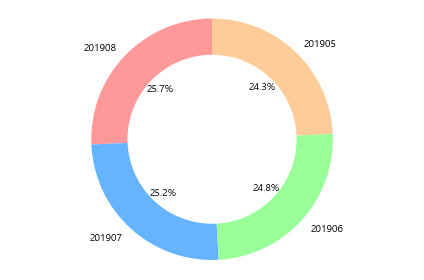

In [52]:
#결제건수??
import matplotlib.pyplot as plt
labels = a['mon']
sizes = a['month']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [53]:
# 결제 금액
dummy = pd.DataFrame(card_final.groupby('month').sum()['use_amount'])
dummy = dummy.reset_index().rename(columns={'index':'month'})
dummy

,month,use_amount
0,201905,180875.6989
1,201906,185653.8091
2,201907,203753.4368
3,201908,261151.6592


In [54]:
# import matplotlib.pyplot as plt
# labels = dummy['month']
# sizes = dummy['use_amount']
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# `
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, colors = colors, labels=labels, 
#         autopct='%1.1f%%', startangle=90)

# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
# # Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
# plt.tight_layout()
# plt.show()

# amount 등수 별로

## amount1_10004324595

- 우도 + 성산읍

    - 55    10004324595
    - 64    10004324796
    - 59    10004324693
    - 65    10004324797
    - 72    10004334902
    - 61    10004324695
    - 57    10004324597
    - 62    10004324697
    - 60    10004324694
    - 53    10004324593
    - 67    10004334801
    - 54    10004324594
    - 74    10004335000
    - 56    10004324596
    - 58    10004324598
    - 69    10004334803
    - 31    10004324287
    - 66    10004334800
    - 48    10004324497
    - 42    10004324490

In [55]:
#고성리

amount1 = card_final[card_final['grid_id'] == '10004324595']
amount1 = amount1.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount1 = amount1.reset_index().rename({'index':'user_type'})
amount1 = amount1.sort_values(by = 'use_amount',ascending = False)

amount1.head(50)
# amount1.to_csv('amount1.csv',encoding = 'utf-8',index=False)
# amount1 = card_final[card_final['grid_id'] == '10004324595']
# amount1 = pd.DataFrame(amount1.groupby(['month','biz_type']).sum()['use_amount'])
# # amount1 = card_final.reset_index().rename({'index':'month'})
# amount1 = amount1.sort_values(by = 'use_amount',ascending = False)

# amount1


,month,user_type,biz_type,use_amount
79,201908,내국인,한식 음식점업,26261.5000
55,201907,내국인,한식 음식점업,20714.3100
32,201906,내국인,한식 음식점업,19170.0500
9,201905,내국인,한식 음식점업,18024.8400
91,201908,제주도민,한식 음식점업,10568.3100
74,201908,내국인,여관업,10132.3859
21,201905,제주도민,한식 음식점업,10019.7122
67,201907,제주도민,한식 음식점업,9508.1916
44,201906,제주도민,한식 음식점업,9043.8400
50,201907,내국인,여관업,9041.7471


## amount2 -10004324796

In [56]:
amount2 = card_final[card_final['grid_id'] == '10004324796']
amount2 = amount2.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount2 = amount2.reset_index().rename({'index':'user_type'})
amount2 = amount2.sort_values(by = 'use_amount',ascending = False)

amount2.head(20)
amount2.to_csv('amount2.csv',encoding = 'utf-8',index=False)

amount2

,month,user_type,biz_type,use_amount
66,201908,내국인,한식 음식점업,23312.7750
28,201906,내국인,한식 음식점업,16881.0100
47,201907,내국인,한식 음식점업,15963.4065
9,201905,내국인,한식 음식점업,15672.0600
75,201908,제주도민,한식 음식점업,3448.2700
...,...,...,...,...
0,201905,내국인,기타 수상오락 서비스업,13.2000
52,201907,제주도민,여관업,10.0000
19,201906,내국인,기타 수상오락 서비스업,9.7000
14,201905,제주도민,여관업,9.5000


## amount3_10004324693

In [57]:
amount3 = card_final[card_final['grid_id'] == '10004324693']
amount3 = amount3.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount3 = amount3.reset_index().rename({'index':'user_type'})
amount3 = amount3.sort_values(by = 'use_amount',ascending = False)

amount3
amount3.to_csv('amount3.csv',encoding = 'utf-8',index=False)
amount3

,month,user_type,biz_type,use_amount
24,201908,내국인,휴양콘도 운영업,22784.0000
17,201907,내국인,휴양콘도 운영업,17609.6370
3,201905,내국인,휴양콘도 운영업,12178.7287
10,201906,내국인,휴양콘도 운영업,12141.8350
23,201908,내국인,한식 음식점업,5175.4100
16,201907,내국인,한식 음식점업,3396.2000
2,201905,내국인,한식 음식점업,3288.5700
9,201906,내국인,한식 음식점업,3196.2900
28,201908,제주도민,휴양콘도 운영업,1704.1600
19,201907,제주도민,한식 음식점업,1142.1300


## amount4 - 10004324797

In [58]:
amount4 = card_final[card_final['grid_id'] == '10004324797']
amount4 = amount4.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount4 = amount4.reset_index().rename({'index':'user_type'})
amount4 = amount4.sort_values(by = 'use_amount',ascending = False)
amount4.to_csv('amount4.csv',encoding = 'utf-8',index=False)
amount4



,month,user_type,biz_type,use_amount
63,201908,내국인,한식 음식점업,12975.7900
26,201906,내국인,한식 음식점업,8584.1900
8,201905,내국인,한식 음식점업,8072.1200
44,201907,내국인,한식 음식점업,7409.5265
59,201908,내국인,여관업,2886.3733
...,...,...,...,...
0,201905,내국인,기타 주점업,43.0000
66,201908,제주도민,빵 및 과자류 소매업,39.7600
47,201907,제주도민,빵 및 과자류 소매업,25.0100
29,201906,제주도민,빵 및 과자류 소매업,23.8800


## amount5 10004334902


In [59]:
amount5 = card_final[card_final['grid_id'] == '10004334902']
amount5 = amount5.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount5 = amount5.reset_index().rename({'index':'user_type'})
amount5 = amount5.sort_values(by = 'use_amount',ascending = False)
amount5.to_csv('amount5.csv',encoding = 'utf-8',index=False)
amount5


,month,user_type,biz_type,use_amount
41,201908,내국인,한식 음식점업,4890.1112
29,201907,내국인,한식 음식점업,4375.0900
17,201906,내국인,한식 음식점업,3838.6250
5,201905,내국인,한식 음식점업,3829.6026
38,201908,내국인,서양식 음식점업,3269.9600
26,201907,내국인,서양식 음식점업,2501.5750
14,201906,내국인,서양식 음식점업,2022.7850
2,201905,내국인,서양식 음식점업,1982.8050
25,201907,내국인,비알콜 음료점업,1437.1500
37,201908,내국인,비알콜 음료점업,1426.1700


## amount6 10004324695


In [60]:
amount6 = card_final[card_final['grid_id'] == '10004324695']
amount6 = amount6.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount6 = amount6.reset_index().rename({'index':'user_type'})
amount6 = amount6.sort_values(by = 'use_amount',ascending = False)
amount6.to_csv('amount6.csv',encoding = 'utf-8',index=False)
amount6


,month,user_type,biz_type,use_amount
17,201908,내국인,한식 음식점업,8579.1000
1,201905,내국인,한식 음식점업,6847.1000
12,201907,내국인,한식 음식점업,6623.8000
6,201906,내국인,한식 음식점업,6478.5300
9,201906,제주도민,한식 음식점업,765.9000
3,201905,제주도민,한식 음식점업,708.6000
14,201907,제주도민,한식 음식점업,664.5000
19,201908,제주도민,한식 음식점업,553.3031
15,201908,내국인,서양식 음식점업,535.4200
10,201907,내국인,서양식 음식점업,349.8900


## amount7 10004324597


In [61]:
amount7 = card_final[card_final['grid_id'] == '10004324597']
amount7 = amount7.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount7 = amount7.reset_index().rename({'index':'user_type'})
amount7 = amount7.sort_values(by = 'use_amount',ascending = False)
amount7.to_csv('amount7.csv',encoding = 'utf-8',index=False)
amount7


,month,user_type,biz_type,use_amount
27,201908,내국인,한식 음식점업,8770.910
19,201907,내국인,한식 음식점업,6568.110
11,201906,내국인,한식 음식점업,6142.680
3,201905,내국인,한식 음식점업,6114.440
31,201908,제주도민,한식 음식점업,694.960
7,201905,제주도민,한식 음식점업,645.360
23,201907,제주도민,한식 음식점업,623.370
15,201906,제주도민,한식 음식점업,606.190
25,201908,내국인,서양식 음식점업,466.010
17,201907,내국인,서양식 음식점업,252.360


## amount8 10004324697


In [62]:
amount8 = card_final[card_final['grid_id'] == '10004324697']
amount8 = amount8.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount8 = amount8.reset_index().rename({'index':'user_type'})
amount8 = amount8.sort_values(by = 'use_amount',ascending = False)
amount8.to_csv('amount8.csv',encoding = 'utf-8',index=False)
amount8


,month,user_type,biz_type,use_amount
26,201908,내국인,한식 음식점업,6535.900
10,201906,내국인,한식 음식점업,5373.430
3,201905,내국인,한식 음식점업,5021.325
18,201907,내국인,한식 음식점업,4042.925
22,201907,제주도민,한식 음식점업,738.100
30,201908,제주도민,한식 음식점업,694.950
23,201908,내국인,서양식 음식점업,610.550
6,201905,제주도민,한식 음식점업,551.370
25,201908,내국인,중식 음식점업,513.100
14,201906,제주도민,한식 음식점업,451.650


## amount9 10004324694


In [63]:
amount9 = card_final[card_final['grid_id'] == '10004324694']
amount9 = amount9.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount9 = amount9.reset_index().rename({'index':'user_type'})
amount9 = amount9.sort_values(by = 'use_amount',ascending = False)
amount9.to_csv('amount9.csv',encoding = 'utf-8',index=False)
amount9


,month,user_type,biz_type,use_amount
37,201908,내국인,한식 음식점업,6354.275
25,201907,내국인,한식 음식점업,4635.790
14,201906,내국인,한식 음식점업,4369.250
4,201905,내국인,한식 음식점업,4081.720
32,201908,내국인,비알콜 음료점업,1007.690
9,201905,제주도민,한식 음식점업,713.770
42,201908,제주도민,한식 음식점업,672.690
20,201907,내국인,비알콜 음료점업,657.290
10,201906,내국인,비알콜 음료점업,615.220
19,201906,제주도민,한식 음식점업,589.165


## amount10 10004324593


In [64]:
amount10 = card_final[card_final['grid_id'] == '10004324593']
amount10 = amount10.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount10 = amount10.reset_index().rename({'index':'user_type'})
amount10 = amount10.sort_values(by = 'use_amount',ascending = False)
amount10.to_csv('amount10.csv',encoding = 'utf-8',index=False)
amount10


,month,user_type,biz_type,use_amount
21,201908,내국인,한식 음식점업,4902.9500
3,201905,내국인,한식 음식점업,4320.1000
9,201906,내국인,한식 음식점업,3815.1000
15,201907,내국인,한식 음식점업,3358.8516
17,201907,제주도민,한식 음식점업,1548.9500
25,201908,제주도민,한식 음식점업,1527.7000
5,201905,제주도민,한식 음식점업,1241.6500
12,201906,제주도민,한식 음식점업,1156.7500
18,201908,내국인,서양식 음식점업,948.9000
13,201907,내국인,서양식 음식점업,764.3000


## amount11 10004334801


In [65]:
amount11 = card_final[card_final['grid_id'] == '10004334801']
amount11 = amount11.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount11 = amount11.reset_index().rename({'index':'user_type'})
amount11 = amount11.sort_values(by = 'use_amount',ascending = False)
amount11.to_csv('amount11.csv',encoding = 'utf-8',index=False)
amount11


,month,user_type,biz_type,use_amount
27,201908,내국인,한식 음식점업,4772.480
3,201905,내국인,한식 음식점업,4663.100
19,201907,내국인,한식 음식점업,3308.700
11,201906,내국인,한식 음식점업,2929.175
26,201908,내국인,중식 음식점업,2294.100
10,201906,내국인,중식 음식점업,1852.600
18,201907,내국인,중식 음식점업,1764.000
7,201905,제주도민,한식 음식점업,454.880
23,201907,제주도민,한식 음식점업,367.750
15,201906,제주도민,한식 음식점업,310.800


## amount12 10004324594


In [66]:
amount12= card_final[card_final['grid_id'] == '10004324594']
amount12 = amount12.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount12 = amount12.reset_index().rename({'index':'user_type'})
amount12 = amount12.sort_values(by = 'use_amount',ascending = False)
amount12.to_csv('amount12.csv',encoding = 'utf-8',index=False)
amount12


,month,user_type,biz_type,use_amount
32,201908,내국인,한식 음식점업,3699.5500
22,201907,내국인,한식 음식점업,2816.4000
3,201905,내국인,한식 음식점업,2317.0000
12,201906,내국인,한식 음식점업,2093.3000
27,201907,제주도민,한식 음식점업,1044.4000
37,201908,제주도민,한식 음식점업,663.1000
21,201907,내국인,일식 음식점업,621.8000
28,201908,내국인,그외 기타 분류안된 오락관련 서비스업,596.5750
11,201906,내국인,일식 음식점업,588.3500
17,201906,제주도민,한식 음식점업,573.3000


## amount13 10004335000


In [67]:
amount13= card_final[card_final['grid_id'] == '10004335000']
amount13 = amount13.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount13 = amount13.reset_index().rename({'index':'user_type'})
amount13 = amount13.sort_values(by = 'use_amount',ascending = False)
amount13.to_csv('amount13.csv',encoding = 'utf-8',index=False)
amount13

,month,user_type,biz_type,use_amount
38,201908,내국인,한식 음식점업,2228.900
4,201905,내국인,한식 음식점업,1799.930
26,201907,내국인,한식 음식점업,1635.450
14,201906,내국인,한식 음식점업,1560.100
36,201908,내국인,중식 음식점업,1281.350
10,201906,내국인,빵 및 과자류 소매업,1220.100
1,201905,내국인,빵 및 과자류 소매업,1196.900
22,201907,내국인,빵 및 과자류 소매업,1083.900
34,201908,내국인,빵 및 과자류 소매업,902.200
33,201908,내국인,비알콜 음료점업,758.580


## amount14 10004324596


In [69]:
amount14 = card_final[card_final['grid_id'] == '10004324596']
amount14 = amount14.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount14 = amount14.reset_index().rename({'index':'user_type'})
amount14 = amount14.sort_values(by = 'use_amount',ascending = False)
amount14.to_csv('amount14.csv',encoding = 'utf-8',index=False)
amount14

,month,user_type,biz_type,use_amount
36,201908,내국인,비알콜 음료점업,2417.6954
12,201906,내국인,비알콜 음료점업,1421.3314
38,201908,내국인,여관업,1301.4974
24,201907,내국인,비알콜 음료점업,1108.7270
0,201905,내국인,비알콜 음료점업,1034.1752
14,201906,내국인,여관업,859.8074
26,201907,내국인,여관업,549.5680
2,201905,내국인,여관업,388.3432
41,201908,내국인,한식 음식점업,351.0000
37,201908,내국인,서양식 음식점업,289.9800


## amount15 10004324598


In [70]:
amount15 = card_final[card_final['grid_id'] == '10004324598']
amount15 = amount15.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount15 = amount15.reset_index().rename({'index':'user_type'})
amount15 = amount15.sort_values(by = 'use_amount',ascending = False)
amount15.to_csv('amount15.csv',encoding = 'utf-8',index=False)
amount15

,month,user_type,biz_type,use_amount
11,201907,내국인,여관업,2463.6590
17,201908,내국인,여관업,2280.9702
6,201906,내국인,여관업,1741.5078
18,201908,내국인,한식 음식점업,1257.3600
1,201905,내국인,여관업,1131.6942
12,201907,내국인,한식 음식점업,1122.4300
7,201906,내국인,한식 음식점업,1116.3514
2,201905,내국인,한식 음식점업,787.4400
15,201907,제주도민,한식 음식점업,131.2000
21,201908,제주도민,한식 음식점업,117.2700


## amount16 10004334803


In [71]:
amount16 = card_final[card_final['grid_id'] == '10004334803']
amount16 = amount16.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount16 = amount16.reset_index().rename({'index':'user_type'})
amount16 = amount16.sort_values(by = 'use_amount',ascending = False)
amount16.to_csv('amount16.csv',encoding = 'utf-8',index=False)
amount16

,month,user_type,biz_type,use_amount
20,201908,내국인,한식 음식점업,2783.45
2,201905,내국인,한식 음식점업,1605.45
8,201906,내국인,한식 음식점업,1592.08
14,201907,내국인,한식 음식점업,1497.91
19,201908,내국인,서양식 음식점업,252.27
23,201908,제주도민,한식 음식점업,211.79
13,201907,내국인,서양식 음식점업,204.13
5,201905,제주도민,한식 음식점업,193.72
7,201906,내국인,서양식 음식점업,187.06
18,201908,내국인,비알콜 음료점업,186.10


## amount17 10004324287


In [72]:
amount17 = card_final[card_final['grid_id'] == '10004324287']
amount17 = amount17.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount17 = amount17.reset_index().rename({'index':'user_type'})
amount17 = amount17.sort_values(by = 'use_amount',ascending = False)
amount17.to_csv('amount17.csv',encoding = 'utf-8',index=False)
amount17

,month,user_type,biz_type,use_amount
29,201908,내국인,한식 음식점업,1013.6900
12,201906,내국인,한식 음식점업,728.9700
10,201906,내국인,일식 음식점업,605.8500
21,201907,내국인,한식 음식점업,593.2800
27,201908,내국인,일식 음식점업,533.2750
4,201905,내국인,한식 음식점업,490.0022
19,201907,내국인,일식 음식점업,436.9000
2,201905,내국인,일식 음식점업,353.5500
26,201908,내국인,서양식 음식점업,346.0300
17,201907,내국인,서양식 음식점업,298.4100


## amount18 10004334800


In [73]:
amount18 = card_final[card_final['grid_id'] == '10004334800']
amount18 = amount18.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount18 = amount18.reset_index().rename({'index':'user_type'})
amount18 = amount18.sort_values(by = 'use_amount',ascending = False)
amount18.to_csv('amount18.csv',encoding = 'utf-8',index=False)
amount18

,month,user_type,biz_type,use_amount
6,201905,내국인,한식 음식점업,690.000
41,201908,내국인,빵 및 과자류 소매업,644.930
46,201908,내국인,한식 음식점업,633.050
19,201906,내국인,한식 음식점업,539.000
32,201907,내국인,한식 음식점업,487.400
27,201907,내국인,빵 및 과자류 소매업,455.665
15,201906,내국인,빵 및 과자류 소매업,381.220
1,201905,내국인,빵 및 과자류 소매업,303.205
53,201908,제주도민,한식 음식점업,225.550
45,201908,내국인,"피자, 햄버거, 샌드위치 및 유사 음식점업",224.760


## amount19 10004324497



In [74]:
amount19 = card_final[card_final['grid_id'] == '10004324497']
amount19 = amount19.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount19 = amount19.reset_index().rename({'index':'user_type'})
amount19 = amount19.sort_values(by = 'use_amount',ascending = False)
amount19.to_csv('amount19.csv',encoding = 'utf-8',index=False)
amount19

,month,user_type,biz_type,use_amount
4,201907,내국인,한식 음식점업,1941.70
6,201908,내국인,한식 음식점업,1913.80
2,201906,내국인,한식 음식점업,1893.40
0,201905,내국인,한식 음식점업,1309.75
5,201907,제주도민,한식 음식점업,247.80
7,201908,제주도민,한식 음식점업,185.30
1,201905,제주도민,한식 음식점업,115.40
3,201906,제주도민,한식 음식점업,111.30


## amount20 10004324490



In [75]:
amount20 = card_final[card_final['grid_id'] == '10004324490']
amount20 = amount20.groupby(['month','user_type','biz_type']).sum()['use_amount']
amount20 = amount20.reset_index().rename({'index':'user_type'})
amount20 = amount20.sort_values(by = 'use_amount',ascending = False)
amount20.to_csv('amount20.csv',encoding = 'utf-8',index=False)
amount20

,month,user_type,biz_type,use_amount
6,201905,내국인,한식 음식점업,885.20
45,201908,내국인,한식 음식점업,834.10
32,201907,내국인,한식 음식점업,706.55
19,201906,내국인,한식 음식점업,543.30
25,201906,제주도민,한식 음식점업,449.70
12,201905,제주도민,한식 음식점업,399.40
0,201905,내국인,기타 외국식 음식점업,386.10
38,201907,제주도민,한식 음식점업,316.70
51,201908,제주도민,한식 음식점업,279.00
39,201908,내국인,기타 외국식 음식점업,242.50


# 리별로 합치기

## 고성리
-
- 10004324595 : amount1
- 10004324693 : amount3
- 10004324695 : amount6
- 10004324694 : amount9
- 10004324593 : amount10
- 10004324594 : amount12



In [76]:
gs_amount = pd.concat([amount1,amount3,amount6,amount9,amount10,amount12])

In [77]:
gs_amount

gs_total = gs_amount.groupby(['biz_type']).sum()['use_amount']
gs_total = gs_total.reset_index().rename({'index':'user_type'})
gs_total = gs_total.sort_values(by = 'use_amount',ascending = False)
gs_total.to_csv('gs_total.csv',encoding = 'utf-8',index=False)
gs_total.head(20)

,biz_type,use_amount
12,한식 음식점업,229868.7885
14,휴양콘도 운영업,68990.5721
7,여관업,40580.7706
8,일반유흥 주점업,30794.2500
6,서양식 음식점업,19536.0019
5,빵 및 과자류 소매업,11904.7565
9,일식 음식점업,8307.3200
2,기타 외국식 음식점업,7240.4035
11,"피자, 햄버거, 샌드위치 및 유사 음식점업",6159.2271
3,기타 주점업,5514.9000


In [78]:
gs_amount

gs_total = gs_amount.groupby(['user_type','biz_type']).sum()['use_amount']
gs_total = gs_total.reset_index().rename({'index':'user_type'})
gs_total = gs_total.sort_values(by = 'use_amount',ascending = False)
gs_total.to_csv('gs_total.csv',encoding = 'utf-8',index=False)
gs_total.head(20)

,user_type,biz_type,use_amount
12,내국인,한식 음식점업,174519.9866
14,내국인,휴양콘도 운영업,64714.2007
27,제주도민,한식 음식점업,55348.8019
7,내국인,여관업,33428.6157
23,제주도민,일반유흥 주점업,21418.9500
6,내국인,서양식 음식점업,15578.2399
8,내국인,일반유흥 주점업,9375.3000
22,제주도민,여관업,7152.1549
9,내국인,일식 음식점업,6998.1900
5,내국인,빵 및 과자류 소매업,6835.1260


In [79]:
gs_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 12 to 1
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_type   30 non-null     object 
 1   biz_type    30 non-null     object 
 2   use_amount  30 non-null     float64
dtypes: float64(1), object(2)
memory usage: 960.0+ bytes


## 성산리 

- 10004324796 : amount2
- 10004324797 : amount4


In [80]:
ss_amount = pd.concat([amount2,amount4])
ss_total = ss_amount.groupby(['biz_type']).sum()['use_amount']
ss_total = ss_total.reset_index().rename({'index':'user_type'})
ss_total = ss_total.sort_values(by = 'use_amount',ascending=False)
ss_total

,biz_type,use_amount
12,한식 음식점업,127873.9529
9,일식 음식점업,14382.1250
7,여관업,10928.7280
6,서양식 음식점업,9052.5080
5,빵 및 과자류 소매업,7091.9070
10,중식 음식점업,5740.6094
4,비알콜 음료점업,5304.1300
11,"피자, 햄버거, 샌드위치 및 유사 음식점업",2631.2390
2,기타 외국식 음식점업,1335.2000
3,기타 주점업,1020.0000


In [81]:
ss_amount = pd.concat([amount2,amount4])
ss_total = ss_amount.groupby(['user_type','biz_type']).sum()['use_amount']
ss_total = ss_total.reset_index().rename({'index':'user_type'})
ss_total = ss_total.sort_values(by = 'use_amount',ascending=False)

In [82]:
ss_total.head(40)

,user_type,biz_type,use_amount
12,내국인,한식 음식점업,108870.8780
23,제주도민,한식 음식점업,19003.0749
9,내국인,일식 음식점업,11425.8750
7,내국인,여관업,10005.5192
6,내국인,서양식 음식점업,7691.2280
5,내국인,빵 및 과자류 소매업,5553.6260
4,내국인,비알콜 음료점업,4518.5450
10,내국인,중식 음식점업,3645.3094
20,제주도민,일식 음식점업,2956.2500
11,내국인,"피자, 햄버거, 샌드위치 및 유사 음식점업",2206.6630


## 시흥리
- 10004324598 : amount15

In [83]:
sh_total = amount15.groupby(['biz_type']).sum()['use_amount']
sh_total = sh_total.reset_index().rename({'index':'user_type'})
sh_total = sh_total.sort_values(by='use_amount',ascending = False)

sh_total

,biz_type,use_amount
1,여관업,7807.5134
2,한식 음식점업,4652.6714
0,비알콜 음료점업,93.1140


In [84]:
sh_total = amount15.groupby(['user_type','biz_type']).sum()['use_amount']
sh_total = sh_total.reset_index().rename({'index':'user_type'})
sh_total = sh_total.sort_values(by='use_amount',ascending = False)

In [85]:
sh_total

,user_type,biz_type,use_amount
1,내국인,여관업,7617.8312
2,내국인,한식 음식점업,4283.5814
5,제주도민,한식 음식점업,369.0900
4,제주도민,여관업,189.6822
0,내국인,비알콜 음료점업,89.4050
3,제주도민,비알콜 음료점업,3.7090


## 신산리

- 10004324287 : amount17


In [86]:
sin_total = amount17.groupby(['biz_type']).sum()['use_amount']
sin_total = sin_total.reset_index().rename({'index':'user_type'})
sin_total = sin_total.sort_values(by='use_amount',ascending = False)

sin_total

,biz_type,use_amount
4,한식 음식점업,3703.8422
2,일식 음식점업,2426.4750
0,서양식 음식점업,1302.4400
3,중식 음식점업,600.0000
1,여관업,150.0000


In [87]:
sin_total = amount17.groupby(['user_type','biz_type']).sum()['use_amount']
sin_total = sin_total.reset_index().rename({'index':'user_type'})
sin_total = sin_total.sort_values(by='use_amount',ascending = False)

In [88]:
sin_total

,user_type,biz_type,use_amount
4,내국인,한식 음식점업,2825.9422
2,내국인,일식 음식점업,1929.5750
0,내국인,서양식 음식점업,1081.9600
8,제주도민,한식 음식점업,877.9000
6,제주도민,일식 음식점업,496.9000
7,제주도민,중식 음식점업,300.6500
3,내국인,중식 음식점업,299.3500
5,제주도민,서양식 음식점업,220.4800
1,내국인,여관업,150.0000


## 오조리 
- 
- 10004324597 : amount7
- 10004324697 : amount8
- 10004324596 : amount14
- 10004324497 : amount19


In [89]:
ozo_amount = pd.concat([amount7,amount8,amount14,amount19])

ozo_total = ozo_amount.groupby(['biz_type']).sum()['use_amount']
ozo_total = ozo_total.reset_index().rename({'index':'user_type'})
ozo_total = ozo_total.sort_values(by='use_amount',ascending = False)
ozo_total

,biz_type,use_amount
5,한식 음식점업,62828.6200
0,비알콜 음료점업,6960.9668
1,서양식 음식점업,5208.7630
2,여관업,4277.0488
4,중식 음식점업,3117.5600
3,일식 음식점업,529.3000


In [90]:
ozo_amount = pd.concat([amount7,amount8,amount14,amount19])

ozo_total = ozo_amount.groupby(['user_type','biz_type']).sum()['use_amount']
ozo_total = ozo_total.reset_index().rename({'index':'user_type'})
ozo_total = ozo_total.sort_values(by='use_amount',ascending = False)

In [91]:
ozo_total

,user_type,biz_type,use_amount
5,내국인,한식 음식점업,56593.5700
0,내국인,비알콜 음료점업,6294.9990
11,제주도민,한식 음식점업,6235.0500
2,내국인,여관업,3955.0960
1,내국인,서양식 음식점업,3685.3290
10,제주도민,중식 음식점업,1560.5900
4,내국인,중식 음식점업,1556.9700
7,제주도민,서양식 음식점업,1523.4340
6,제주도민,비알콜 음료점업,665.9678
3,내국인,일식 음식점업,394.8000


## 온평리 
- 10004324490 : amount20

In [92]:
onp_total = amount20.groupby(['biz_type']).sum()['use_amount']
onp_total = onp_total.reset_index().rename({'index':'user_type'})
onp_total = onp_total.sort_values(by='use_amount',ascending = False)

onp_total

,biz_type,use_amount
6,한식 음식점업,4413.95
0,기타 외국식 음식점업,1130.50
1,서양식 음식점업,906.54
2,여관업,397.71
5,"피자, 햄버거, 샌드위치 및 유사 음식점업",355.50
4,중식 음식점업,252.60
3,일식 음식점업,88.70


In [93]:
onp_total = amount20.groupby(['user_type','biz_type']).sum()['use_amount']
onp_total = onp_total.reset_index().rename({'index':'user_type'})
onp_total = onp_total.sort_values(by='use_amount',ascending = False)`

SyntaxError: invalid syntax (<ipython-input-93-fa6f4c703c17>, line 3)

In [94]:
onp_total

,biz_type,use_amount
6,한식 음식점업,4413.95
0,기타 외국식 음식점업,1130.50
1,서양식 음식점업,906.54
2,여관업,397.71
5,"피자, 햄버거, 샌드위치 및 유사 음식점업",355.50
4,중식 음식점업,252.60
3,일식 음식점업,88.70


## 우도

- 10004334902 : amount5 
- 10004334801 : amount11
- 10004335000 : amount13
- 10004334803 : amount16
- 10004334800 : amount18


In [95]:
udo_amount = pd.concat([amount5,amount11,amount13,amount16,amount18])

udo_total = udo_amount.groupby(['biz_type']).sum()['use_amount']
udo_total = udo_total.reset_index().rename({'index':'user_type'})
udo_total = udo_total.sort_values(by='use_amount',ascending = False)
udo_total

,biz_type,use_amount
8,한식 음식점업,54144.2938
3,서양식 음식점업,14050.8230
6,중식 음식점업,9342.8500
1,비알콜 음료점업,8053.3951
2,빵 및 과자류 소매업,6400.0000
7,"피자, 햄버거, 샌드위치 및 유사 음식점업",1352.5030
4,여관업,1118.9050
0,기타 주점업,1084.1000
5,일식 음식점업,880.4000


In [96]:
udo_amount = pd.concat([amount5,amount11,amount13,amount16,amount18])

udo_total = udo_amount.groupby(['user_type','biz_type']).sum()['use_amount']
udo_total = udo_total.reset_index().rename({'index':'user_type'})
udo_total = udo_total.sort_values(by='use_amount',ascending = False)

In [97]:
udo_total

,user_type,biz_type,use_amount
8,내국인,한식 음식점업,49659.6038
3,내국인,서양식 음식점업,13368.5030
6,내국인,중식 음식점업,8611.7500
1,내국인,비알콜 음료점업,7820.3551
2,내국인,빵 및 과자류 소매업,6188.1200
17,제주도민,한식 음식점업,4484.6900
7,내국인,"피자, 햄버거, 샌드위치 및 유사 음식점업",1115.6330
4,내국인,여관업,867.6550
9,제주도민,기타 주점업,783.0000
15,제주도민,중식 음식점업,731.1000



# 소비 상위 데이터 지역 사용자 분석


- 소비상위지역 20개 그리드를 7개의 리로 분류함
- 분류한 후 7개 리에서 많이 소비되는 업종들을 찾았다
- 그럼 그 리에서 많이 소비하는 사람은 누구일까?

- CF ) 참고할 것은  전체 데이터에서 '리'중 상위 그리드만 뽑는것이지 고성리의 모든 그리드를 뽑는 것이 아니다 


## DT import

In [303]:
#NA값 DROP  #62개 
area =card.copy()
b = area[area['sex'].str.contains('알수없음')].index
area = area.drop(b)

In [304]:
area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12814 entries, 4862 to 20101
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       12814 non-null  object 
 1   dong        12814 non-null  string 
 2   grid_id     12814 non-null  object 
 3   biz_type    12814 non-null  string 
 4   user_type   12814 non-null  string 
 5   age         12814 non-null  object 
 6   sex         12814 non-null  string 
 7   use_amount  12814 non-null  float64
dtypes: float64(1), object(3), string(4)
memory usage: 901.0+ KB


## 전체

In [219]:
a = area.groupby('sex').sum()['use_amount']
a = pd.DataFrame(a)
a = a.reset_index().rename({'index':'sex'})
a

,sex,use_amount
0,남성,542045.7549
1,여성,396143.5562


### 성별 사용금액

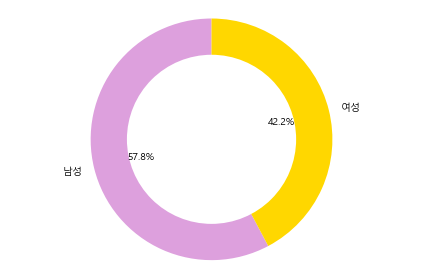

In [220]:
import matplotlib.pyplot as plt
labels = a['sex']
sizes = a['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 나이별 소비금액 

In [221]:
b = area.groupby('age').sum()['use_amount']
b = pd.DataFrame(b)
b = b.reset_index().rename({'index':'age'})

b

,age,use_amount
0,10,1883.9000
1,20,167895.4972
2,30,237906.8691
3,40,238598.8550
4,50,187891.1413
5,60,81717.0663
6,70,22295.9822


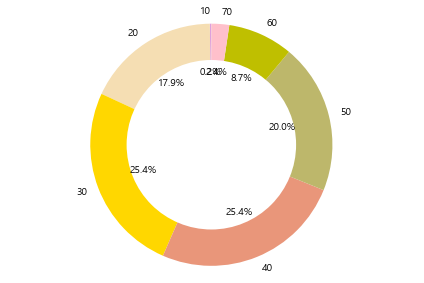

In [222]:
import matplotlib.pyplot as plt
labels = b['age']
sizes = b['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','wheat','gold','darksalmon','darkkhaki','y','pink']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 월별 소비금액

In [217]:
c = area.groupby('month').sum()['use_amount']
c = pd.DataFrame(c)
c = c.reset_index().rename({'index':'month'})
c

,month,use_amount
0,201905,204674.2757
1,201906,210420.2291
2,201907,228700.3836
3,201908,294394.4227


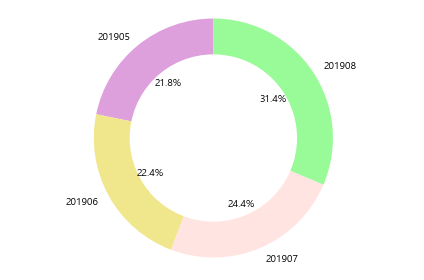

In [218]:
import matplotlib.pyplot as plt
labels = c['month']
sizes = c['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','khaki','mistyrose','palegreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### user type별 소비금액

In [223]:
d = area.groupby('user_type').sum()['use_amount']
d = pd.DataFrame(d)
d = d.reset_index().rename({'index':'user_type'})
d

,user_type,use_amount
0,내국인,743883.1052
1,제주도민,194306.2059


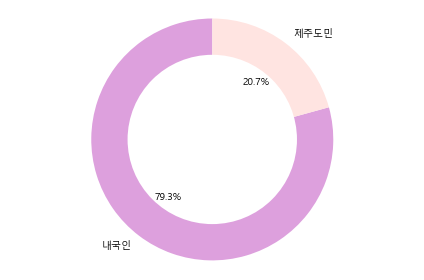

In [224]:
import matplotlib.pyplot as plt
labels = d['user_type']
sizes = d['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','mistyrose']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 업종별

In [227]:
g = area.groupby('biz_type').sum()['use_amount']
g = pd.DataFrame(g)
g = g.reset_index().rename({'index':'biz_type'})
g = g.sort_values(by ='use_amount',ascending = False)
h =g.iloc[0:5]
h

,biz_type,use_amount
14,한식 음식점업,558581.0303
9,여관업,71969.0889
16,휴양콘도 운영업,69138.3721
8,서양식 음식점업,60564.7099
10,일반유흥 주점업,31442.1100


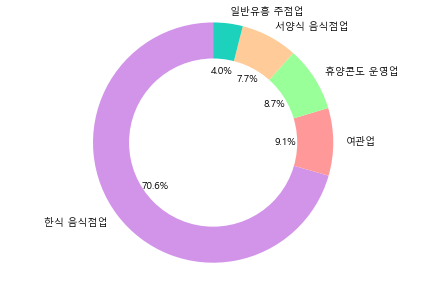

In [228]:
import matplotlib.pyplot as plt
labels = h['biz_type']
sizes = h['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
# colors = ['lightsalmon','peru','darksalmon','gold','y','pink']
colors = ['#d294e8','#ff9999','#99ff99','#ffcc99','#1cd2bd','#d29400','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 고성리
- 휴양콘도 발달? / 유흥주점에서의 소비가 높다 
- 남자의 결제금액 높다?
- 10004324595 : amount1
- 10004324693 : amount3
- 10004324695 : amount6
- 10004324694 : amount9
- 10004324593 : amount10
- 10004324594 : amount12



In [147]:
area_gosung = area[area['grid_id'].apply(lambda x: any(i in x for i in ['10004324595','10004324693','10004324695','10004324694','10004324593','10004324594']))]

In [148]:
area_gosung['grid_id'].value_counts()

10004324595    1007
10004324694     407
10004324594     334
10004324693     321
10004324593     209
10004324695     196
Name: grid_id, dtype: int64

### 성별 사용금액

In [131]:
#사용금액 - 43억

In [150]:
a = area_gosung.groupby('sex').sum()['use_amount']
a = pd.DataFrame(a)
a = a.reset_index().rename({'index':'sex'})

In [151]:
a

,sex,use_amount
0,남성,262511.3842
1,여성,175051.6840


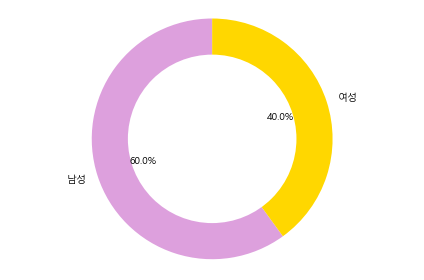

In [153]:
import matplotlib.pyplot as plt
labels = a['sex']
sizes = a['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 나이별 소비금액 

In [262]:
b = area_gosung.groupby('age').sum()['use_amount']
b = pd.DataFrame(b)
b = b.reset_index().rename({'index':'age'})

In [263]:
b

,age,use_amount
0,10,769.5800
1,20,69551.7946
2,30,114713.1467
3,40,115746.8690
4,50,88398.5382
5,60,36962.7741
6,70,11420.3656


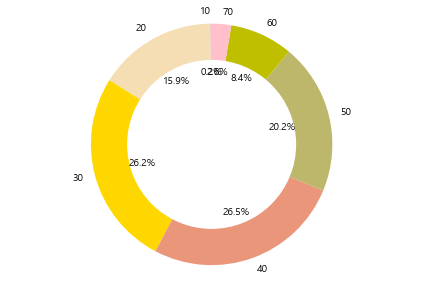

In [264]:
import matplotlib.pyplot as plt
labels = b['age']
sizes = b['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','wheat','gold','darksalmon','darkkhaki','y','pink']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [265]:
f = area_gosung.groupby(['sex','age']).sum()['use_amount']
f = pd.DataFrame(f)
# f = a.reset_index().rename({'index':'age'})

In [181]:
f

use_amount
sex age            
남성  10     347.6350
    20   33943.5860
    30   65999.1833
    40   70812.4062
    50   59960.5197
    60   24739.9593
    70    6708.0947
여성  10     421.9450
    20   35608.2086
    30   48713.9634
    40   44934.4628
    50   28438.0185
    60   12222.8148
    70    4712.2709

### 월별 소비금액

In [163]:
c = area_gosung.groupby('month').sum()['use_amount']
c = pd.DataFrame(c)
c = c.reset_index().rename({'index':'month'})
c

,month,use_amount
0,201905,95104.7323
1,201906,94433.4171
2,201907,113313.1891
3,201908,134711.7297


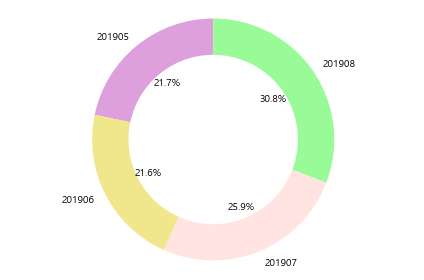

In [167]:
import matplotlib.pyplot as plt
labels = c['month']
sizes = c['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','khaki','mistyrose','palegreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### user type별 소비금액

In [171]:
d = area_gosung.groupby('user_type').sum()['use_amount']
d = pd.DataFrame(d)
d = d.reset_index().rename({'index':'user_type'})
d

,user_type,use_amount
0,내국인,326561.0489
1,제주도민,111002.0193


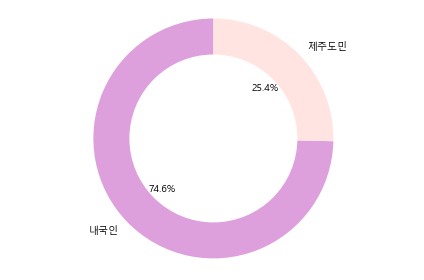

In [173]:
import matplotlib.pyplot as plt
labels = d['user_type']
sizes = d['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','mistyrose']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 업종별

In [189]:
g = area_gosung.groupby('biz_type').sum()['use_amount']
g = pd.DataFrame(g)
g = g.reset_index().rename({'index':'biz_type'})
g = g.sort_values(by ='use_amount',ascending = False)
h =g.iloc[0:5]
h

,biz_type,use_amount
12,한식 음식점업,229815.4585
14,휴양콘도 운영업,68970.3721
7,여관업,40555.8286
8,일반유흥 주점업,30794.2500
6,서양식 음식점업,19536.0019


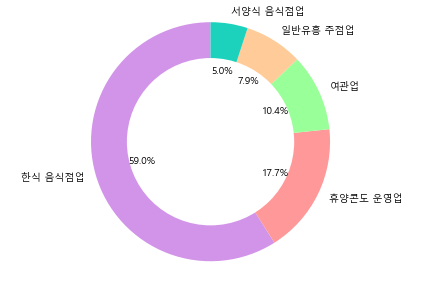

In [209]:
import matplotlib.pyplot as plt
labels = h['biz_type']
sizes = h['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
# colors = ['lightsalmon','peru','darksalmon','gold','y','pink']
colors = ['#d294e8','#ff9999','#99ff99','#ffcc99','#1cd2bd','#d29400','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 성산리

- 내국인의 비율이 타지역보다 높다 
- 음식점 업이 높다?

- 10004324796 : amount2
- 10004324797 : amount4


In [230]:
area_ss = area[area['grid_id'].apply(lambda x: any(i in x for i in ['10004324796','10004324797']))]

In [232]:
area_ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 7014 to 15398
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       1494 non-null   object 
 1   dong        1494 non-null   string 
 2   grid_id     1494 non-null   object 
 3   biz_type    1494 non-null   string 
 4   user_type   1494 non-null   string 
 5   age         1494 non-null   object 
 6   sex         1494 non-null   string 
 7   use_amount  1494 non-null   float64
dtypes: float64(1), object(3), string(4)
memory usage: 105.0+ KB


In [235]:
area_ss

,month,dong,grid_id,biz_type,user_type,age,sex,use_amount
7014,201905,성산읍,10004324796,기타 수상오락 서비스업,내국인,20,남성,1.10
7015,201905,성산읍,10004324796,기타 수상오락 서비스업,내국인,20,여성,1.10
7016,201905,성산읍,10004324796,기타 수상오락 서비스업,내국인,40,여성,11.00
7018,201905,성산읍,10004324796,기타 외국식 음식점업,내국인,20,남성,36.80
7019,201905,성산읍,10004324796,기타 외국식 음식점업,내국인,20,여성,75.60
...,...,...,...,...,...,...,...,...
15394,201908,성산읍,10004324797,한식 음식점업,제주도민,50,남성,706.95
15395,201908,성산읍,10004324797,한식 음식점업,제주도민,50,여성,124.65
15396,201908,성산읍,10004324797,한식 음식점업,제주도민,60,남성,366.70
15397,201908,성산읍,10004324797,한식 음식점업,제주도민,60,여성,56.20


### 성별 사용금액

In [233]:
a = area_ss.groupby('sex').sum()['use_amount']
a = pd.DataFrame(a)
a = a.reset_index().rename({'index':'sex'})
a

,sex,use_amount
0,남성,107142.7961
1,여성,78908.8632


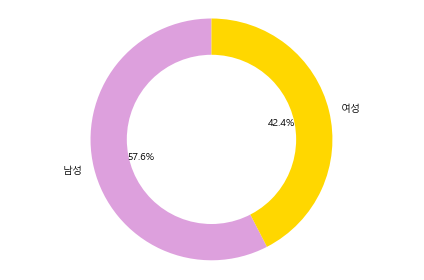

In [234]:
import matplotlib.pyplot as plt
labels = a['sex']
sizes = a['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 나이별 소비금액 

In [239]:
b = area_ss.groupby('age').sum()['use_amount']
b = pd.DataFrame(b)
b = b.reset_index().rename({'index':'age'})

b

,age,use_amount
0,10,482.8450
1,20,33420.1984
2,30,44744.9725
3,40,46156.1037
4,50,39153.4720
5,60,17921.0177
6,70,4173.0500


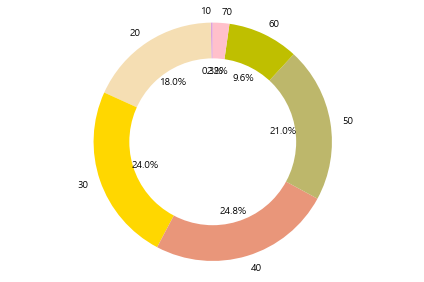

In [241]:
import matplotlib.pyplot as plt
labels = b['age']
sizes = b['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','wheat','gold','darksalmon','darkkhaki','y','pink']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 월별 소비금액

In [242]:
c = area_ss.groupby('month').sum()['use_amount']
c = pd.DataFrame(c)
c = c.reset_index().rename({'index':'month'})
c

,month,use_amount
0,201905,40824.1039
1,201906,43110.0110
2,201907,40983.0608
3,201908,61134.4836


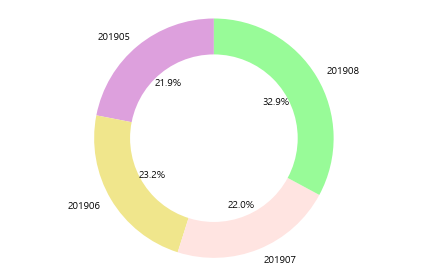

In [243]:
import matplotlib.pyplot as plt
labels = c['month']
sizes = c['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','khaki','mistyrose','palegreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### user type별 소비금액

In [244]:
d = area_ss.groupby('user_type').sum()['use_amount']
d = pd.DataFrame(d)
d = d.reset_index().rename({'index':'user_type'})
d

,user_type,use_amount
0,내국인,155812.1036
1,제주도민,30239.5557


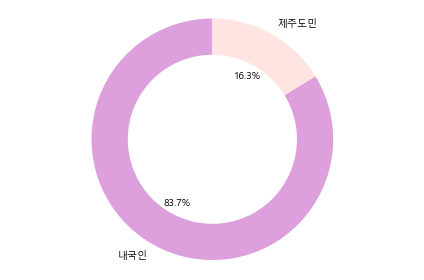

In [245]:
import matplotlib.pyplot as plt
labels = d['user_type']
sizes = d['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','mistyrose']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 업종별

In [246]:
g = area_ss.groupby('biz_type').sum()['use_amount']
g = pd.DataFrame(g)
g = g.reset_index().rename({'index':'biz_type'})
g = g.sort_values(by ='use_amount',ascending = False)
h =g.iloc[0:5]
h

,biz_type,use_amount
12,한식 음식점업,127837.8529
9,일식 음식점업,14373.6250
7,여관업,10917.9280
6,서양식 음식점업,9050.7080
5,빵 및 과자류 소매업,7085.4870


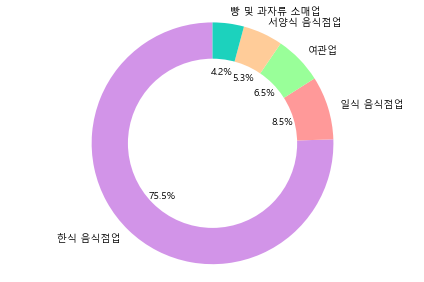

In [247]:
import matplotlib.pyplot as plt
labels = h['biz_type']
sizes = h['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
# colors = ['lightsalmon','peru','darksalmon','gold','y','pink']
colors = ['#d294e8','#ff9999','#99ff99','#ffcc99','#1cd2bd','#d29400','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 시흥리
- 10004324598 : amount15

- 30-40대 비율이 엄청 많다
- 타지역 대비 7월의 소비량이 높다 / 5월 소비량 낮음
- 대부분 소비는 내국인 not 도민
- 여관업과 한식업으로만 소비금액발생

In [249]:
area_sh = area[area['grid_id'].apply(lambda x: any(i in x for i in ['10004324598']))]

In [250]:
area_sh

,month,dong,grid_id,biz_type,user_type,age,sex,use_amount
6658,201905,성산읍,10004324598,비알콜 음료점업,내국인,20,남성,1.692
6659,201905,성산읍,10004324598,비알콜 음료점업,내국인,20,여성,1.432
6660,201905,성산읍,10004324598,비알콜 음료점업,내국인,30,남성,3.721
6661,201905,성산읍,10004324598,비알콜 음료점업,내국인,30,여성,2.255
6662,201905,성산읍,10004324598,비알콜 음료점업,내국인,40,남성,6.534
...,...,...,...,...,...,...,...,...
14633,201908,성산읍,10004324598,한식 음식점업,제주도민,40,남성,21.480
14634,201908,성산읍,10004324598,한식 음식점업,제주도민,40,여성,28.030
14635,201908,성산읍,10004324598,한식 음식점업,제주도민,50,남성,21.540
14636,201908,성산읍,10004324598,한식 음식점업,제주도민,50,여성,3.000


### 성별 사용금액

In [251]:
a = area_sh.groupby('sex').sum()['use_amount']
a = pd.DataFrame(a)
a = a.reset_index().rename({'index':'sex'})
a

,sex,use_amount
0,남성,7192.8188
1,여성,5359.9700


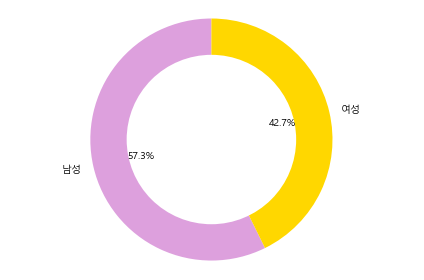

In [252]:
import matplotlib.pyplot as plt
labels = a['sex']
sizes = a['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 나이별 소비금액 

In [260]:
b = area_sh.groupby('age').sum()['use_amount']
b = pd.DataFrame(b)
b = b.reset_index().rename({'index':'age'})

b

,age,use_amount
0,10,26.1700
1,20,1430.9951
2,30,4325.0935
3,40,4617.7957
4,50,1787.8445
5,60,301.4800
6,70,63.4100


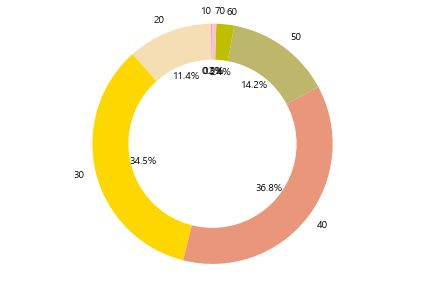

In [261]:
import matplotlib.pyplot as plt
labels = b['age']
sizes = b['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','wheat','gold','darksalmon','darkkhaki','y','pink']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 월별 소비금액

In [266]:
c = area_sh.groupby('month').sum()['use_amount']
c = pd.DataFrame(c)
c = c.reset_index().rename({'index':'month'})
c

,month,use_amount
0,201905,1993.1774
1,201906,3021.1992
2,201907,3818.3760
3,201908,3720.0362


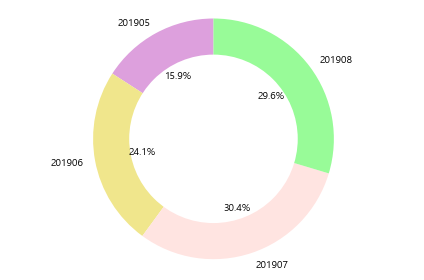

In [267]:
import matplotlib.pyplot as plt
labels = c['month']
sizes = c['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','khaki','mistyrose','palegreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### user type별 소비금액

In [268]:
d = area_sh.groupby('user_type').sum()['use_amount']
d = pd.DataFrame(d)
d = d.reset_index().rename({'index':'user_type'})
d

,user_type,use_amount
0,내국인,11990.3076
1,제주도민,562.4812


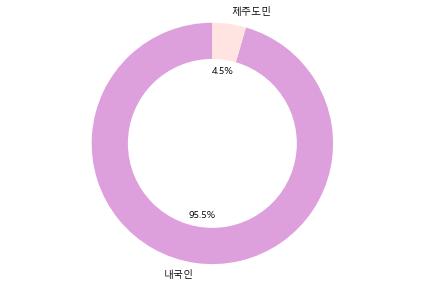

In [269]:
import matplotlib.pyplot as plt
labels = d['user_type']
sizes = d['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','mistyrose']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 업종별

In [271]:
g = area_sh.groupby('biz_type').sum()['use_amount']
g = pd.DataFrame(g)
g = g.reset_index().rename({'index':'biz_type'})
g = g.sort_values(by ='use_amount',ascending = False)
h =g.iloc[0:5]
h

,biz_type,use_amount
1,여관업,7807.0034
2,한식 음식점업,4652.6714
0,비알콜 음료점업,93.1140


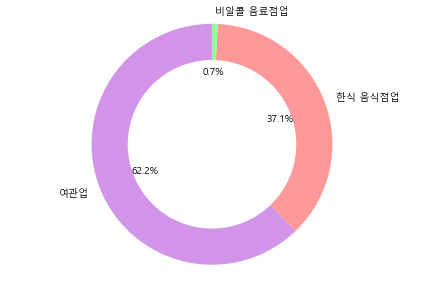

In [272]:
import matplotlib.pyplot as plt
labels = h['biz_type']
sizes = h['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
# colors = ['lightsalmon','peru','darksalmon','gold','y','pink']
colors = ['#d294e8','#ff9999','#99ff99','#ffcc99','#1cd2bd','#d29400','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 신산리  

- 10004324287 : amount17

- 여성이 편귱보다 조금많다 
- 음식점에서의 소비가 대부분

In [276]:
area_sin = area[area['grid_id'].apply(lambda x: any(i in x for i in ['10004324287']))]

### 성별 사용금액

In [278]:
a = area_sin.groupby('sex').sum()['use_amount']
a = pd.DataFrame(a)
a = a.reset_index().rename({'index':'sex'})
a

,sex,use_amount
0,남성,4449.5672
1,여성,3733.1900


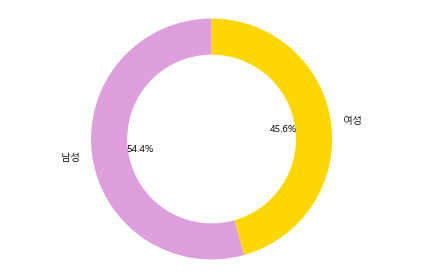

In [279]:
import matplotlib.pyplot as plt
labels = a['sex']
sizes = a['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 나이별 소비금액 

In [281]:
b = area_sin.groupby('age').sum()['use_amount']
b = pd.DataFrame(b)
b = b.reset_index().rename({'index':'age'})

b

,age,use_amount
0,10,15.5000
1,20,843.8500
2,30,1926.0272
3,40,2043.8000
4,50,1687.9300
5,60,1362.5000
6,70,303.1500


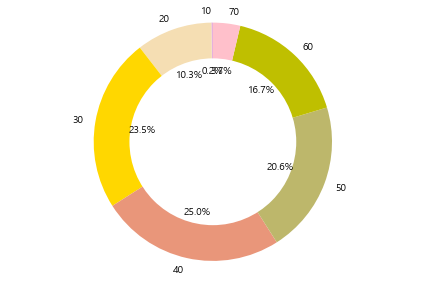

In [282]:
import matplotlib.pyplot as plt
labels = b['age']
sizes = b['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','wheat','gold','darksalmon','darkkhaki','y','pink']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 월별 소비금액

In [283]:
c = area_sin.groupby('month').sum()['use_amount']
c = pd.DataFrame(c)
c = c.reset_index().rename({'index':'month'})
c

,month,use_amount
0,201905,1716.2322
1,201906,2006.6200
2,201907,2000.8700
3,201908,2459.0350


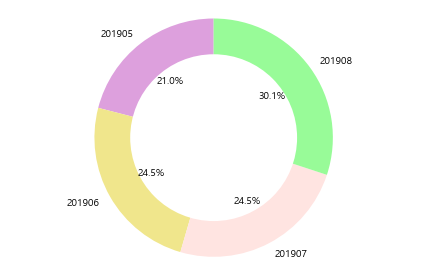

In [284]:
import matplotlib.pyplot as plt
labels = c['month']
sizes = c['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','khaki','mistyrose','palegreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### user type별 소비금액

In [285]:
d = area_sin.groupby('user_type').sum()['use_amount']
d = pd.DataFrame(d)
d = d.reset_index().rename({'index':'user_type'})
d

,user_type,use_amount
0,내국인,6286.8272
1,제주도민,1895.9300


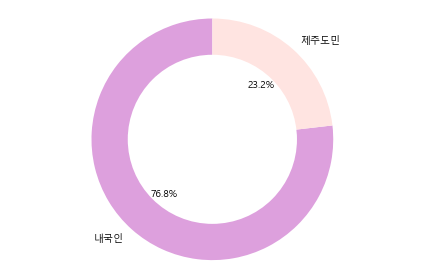

In [286]:
import matplotlib.pyplot as plt
labels = d['user_type']
sizes = d['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','mistyrose']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 업종별

In [287]:
g = area_sin.groupby('biz_type').sum()['use_amount']
g = pd.DataFrame(g)
g = g.reset_index().rename({'index':'biz_type'})
g = g.sort_values(by ='use_amount',ascending = False)
h =g.iloc[0:5]
h

,biz_type,use_amount
4,한식 음식점업,3703.8422
2,일식 음식점업,2426.4750
0,서양식 음식점업,1302.4400
3,중식 음식점업,600.0000
1,여관업,150.0000


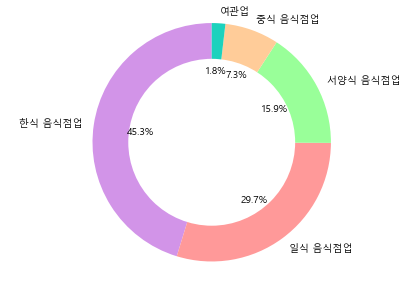

In [288]:
import matplotlib.pyplot as plt
labels = h['biz_type']
sizes = h['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
# colors = ['lightsalmon','peru','darksalmon','gold','y','pink']
colors = ['#d294e8','#ff9999','#99ff99','#ffcc99','#1cd2bd','#d29400','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 오조리

- 10004324597 : amount7
- 10004324697 : amount8
- 10004324596 : amount14
- 10004324497 : amount19

- 

In [305]:
area_ozo = area[area['grid_id'].apply(lambda x: any(i in x for i in['10004324597','10004324697','10004324596','10004324497']))]

In [306]:
area_ozo

,month,dong,grid_id,biz_type,user_type,age,sex,use_amount
5982,201905,성산읍,10004324497,한식 음식점업,내국인,20,남성,78.50
5983,201905,성산읍,10004324497,한식 음식점업,내국인,20,여성,128.90
5984,201905,성산읍,10004324497,한식 음식점업,내국인,30,남성,211.10
5985,201905,성산읍,10004324497,한식 음식점업,내국인,30,여성,220.20
5986,201905,성산읍,10004324497,한식 음식점업,내국인,40,남성,197.90
...,...,...,...,...,...,...,...,...
14983,201908,성산읍,10004324697,한식 음식점업,제주도민,50,여성,58.30
14984,201908,성산읍,10004324697,한식 음식점업,제주도민,60,남성,96.10
14985,201908,성산읍,10004324697,한식 음식점업,제주도민,60,여성,35.65
14986,201908,성산읍,10004324697,한식 음식점업,제주도민,70,남성,52.70


### 성별 사용금액

In [308]:
a = area_ozo.groupby('sex').sum()['use_amount']
a = pd.DataFrame(a)
a = a.reset_index().rename({'index':'sex'})
a

,sex,use_amount
0,남성,45636.3142
1,여성,37279.8944


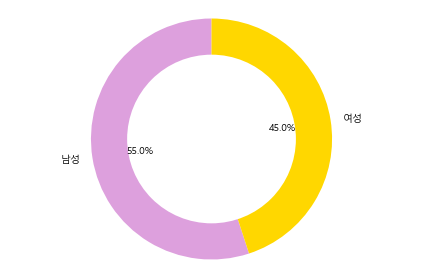

In [309]:
import matplotlib.pyplot as plt
labels = a['sex']
sizes = a['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 나이별 소비금액 

In [310]:
b = area_ozo.groupby('age').sum()['use_amount']
b = pd.DataFrame(b)
b = b.reset_index().rename({'index':'age'})

b

,age,use_amount
0,10,246.4250
1,20,16692.6690
2,30,22968.6802
3,40,21017.6094
4,50,13981.0726
5,60,6114.6874
6,70,1895.0650


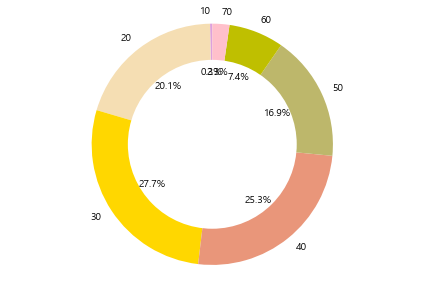

In [311]:
import matplotlib.pyplot as plt
labels = b['age']
sizes = b['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','wheat','gold','darksalmon','darkkhaki','y','pink']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 월별 소비금액

In [312]:
c = area_ozo.groupby('month').sum()['use_amount']
c = pd.DataFrame(c)
c = c.reset_index().rename({'index':'month'})
c

,month,use_amount
0,201905,17624.5954
1,201906,19803.7218
2,201907,18814.0596
3,201908,26673.8318


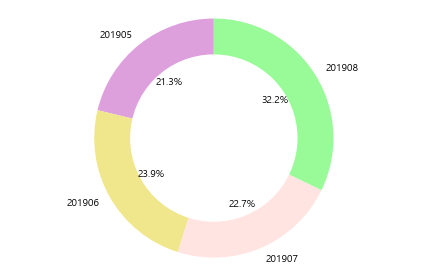

In [313]:
import matplotlib.pyplot as plt
labels = c['month']
sizes = c['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','khaki','mistyrose','palegreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### user type별 소비금액

In [314]:
d = area_ozo.groupby('user_type').sum()['use_amount']
d = pd.DataFrame(d)
d = d.reset_index().rename({'index':'user_type'})
d

,user_type,use_amount
0,내국인,72474.7140
1,제주도민,10441.4946


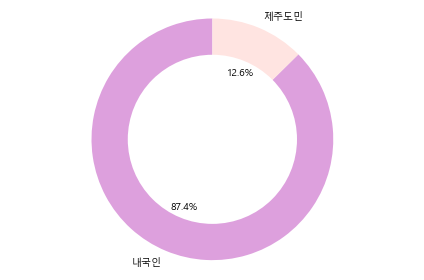

In [315]:
import matplotlib.pyplot as plt
labels = d['user_type']
sizes = d['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','mistyrose']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 업종별

In [316]:
g = area_ozo.groupby('biz_type').sum()['use_amount']
g = pd.DataFrame(g)
g = g.reset_index().rename({'index':'biz_type'})
g = g.sort_values(by ='use_amount',ascending = False)
h =g.iloc[0:5]
h

,biz_type,use_amount
5,한식 음식점업,62823.1200
0,비알콜 음료점업,6960.9668
1,서양식 음식점업,5208.7630
2,여관업,4276.4988
4,중식 음식점업,3117.5600


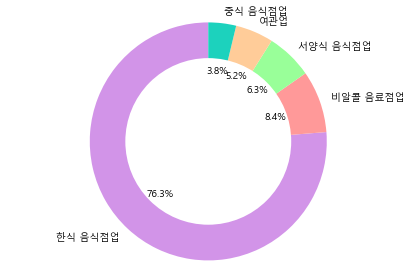

In [317]:
import matplotlib.pyplot as plt
labels = h['biz_type']
sizes = h['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
# colors = ['lightsalmon','peru','darksalmon','gold','y','pink']
colors = ['#d294e8','#ff9999','#99ff99','#ffcc99','#1cd2bd','#d29400','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 온평리 
- 10004324490 : amount20
- 남성의 소비 비율이 높다 
- 5월지출비율이 평균보다 높고 6월 지출비율이 평균보다 낮다 
- 제주도민의 지출비율이 높다 
- 전체의 95%가 음식점업 

In [321]:
area_onp = area[area['grid_id'].apply(lambda x: any( i in x for i in ['10004324490']))]

In [322]:
area_onp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 5779 to 13729
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       344 non-null    object 
 1   dong        344 non-null    string 
 2   grid_id     344 non-null    object 
 3   biz_type    344 non-null    string 
 4   user_type   344 non-null    string 
 5   age         344 non-null    object 
 6   sex         344 non-null    string 
 7   use_amount  344 non-null    float64
dtypes: float64(1), object(3), string(4)
memory usage: 24.2+ KB


### 성별 사용금액

In [337]:
a = area_onp.groupby('sex').sum()['use_amount']
a = pd.DataFrame(a)
a = a.reset_index().rename({'index':'sex'})
a

,sex,use_amount
0,남성,4770.8
1,여성,2774.7


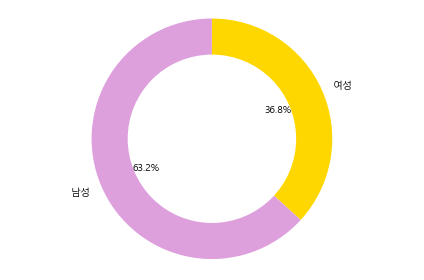

In [338]:
import matplotlib.pyplot as plt
labels = a['sex']
sizes = a['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 나이별 소비금액 

In [339]:
b = area_onp.groupby('age').sum()['use_amount']
b = pd.DataFrame(b)
b = b.reset_index().rename({'index':'age'})

b

,age,use_amount
0,10,0.90
1,20,1423.08
2,30,1966.02
3,40,1816.50
4,50,1434.10
5,60,709.60
6,70,195.30


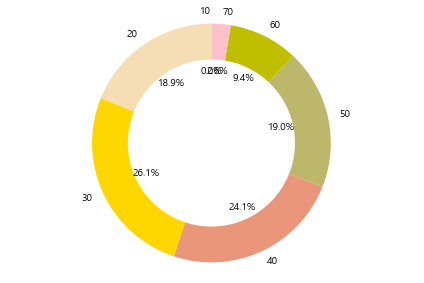

In [340]:
import matplotlib.pyplot as plt
labels = b['age']
sizes = b['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','wheat','gold','darksalmon','darkkhaki','y','pink']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 월별 소비금액

In [341]:
c = area_onp.groupby('month').sum()['use_amount']
c = pd.DataFrame(c)
c = c.reset_index().rename({'index':'month'})
c

,month,use_amount
0,201905,2179.61
1,201906,1595.39
2,201907,1853.36
3,201908,1917.14


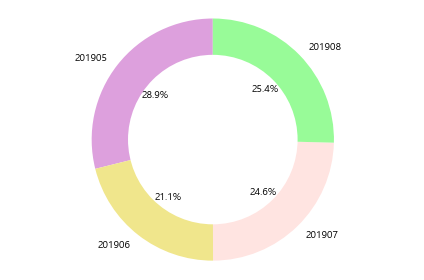

In [342]:
import matplotlib.pyplot as plt
labels = c['month']
sizes = c['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','khaki','mistyrose','palegreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### user type별 소비금액

In [332]:
d = area_onp.groupby('user_type').sum()['use_amount']
d = pd.DataFrame(d)
d = d.reset_index().rename({'index':'user_type'})
d

,user_type,use_amount
0,내국인,5460.3
1,제주도민,2085.2


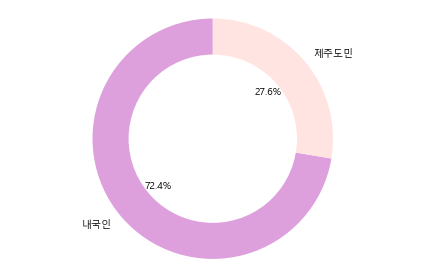

In [333]:
import matplotlib.pyplot as plt
labels = d['user_type']
sizes = d['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','mistyrose']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 업종별

In [335]:
g = area_onp.groupby('biz_type').sum()['use_amount']
g = pd.DataFrame(g)
g = g.reset_index().rename({'index':'biz_type'})
g = g.sort_values(by ='use_amount',ascending = False)
h =g.iloc[0:5]
h

,biz_type,use_amount
6,한식 음식점업,4413.95
0,기타 외국식 음식점업,1130.50
1,서양식 음식점업,906.54
2,여관업,397.71
5,"피자, 햄버거, 샌드위치 및 유사 음식점업",355.50


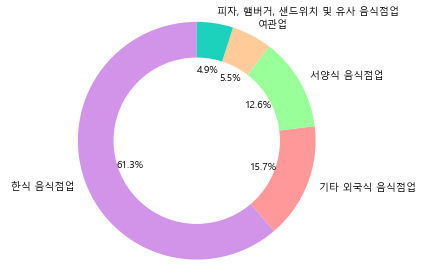

In [336]:
import matplotlib.pyplot as plt
labels = h['biz_type']
sizes = h['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
# colors = ['lightsalmon','peru','darksalmon','gold','y','pink']
colors = ['#d294e8','#ff9999','#99ff99','#ffcc99','#1cd2bd','#d29400','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 우도

- 10004334902 : amount5 
- 10004334801 : amount11
- 10004335000 : amount13
- 10004334803 : amount16
- 10004334800 : amount18

- 여성의 카드사용 비율이 굉장히 높다 / 타지역 대비
- 20대 소비비율이 높다 
- 내국인의 소비비율이 90%
- 보통 다 음식 업종

In [347]:
area_udo = area[area['grid_id'].apply(lambda x: any( i in x for i in ['10004334902','10004334801','10004335000','10004334803','10004334800']))]

In [348]:
area_udo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1713 entries, 16841 to 20006
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       1713 non-null   object 
 1   dong        1713 non-null   string 
 2   grid_id     1713 non-null   object 
 3   biz_type    1713 non-null   string 
 4   user_type   1713 non-null   string 
 5   age         1713 non-null   object 
 6   sex         1713 non-null   string 
 7   use_amount  1713 non-null   float64
dtypes: float64(1), object(3), string(4)
memory usage: 120.4+ KB


### 성별 사용금액

In [350]:
a = area_udo.groupby('sex').sum()['use_amount']
a = pd.DataFrame(a)
a = a.reset_index().rename({'index':'sex'})
a

,sex,use_amount
0,남성,46852.6635
1,여성,49517.5164


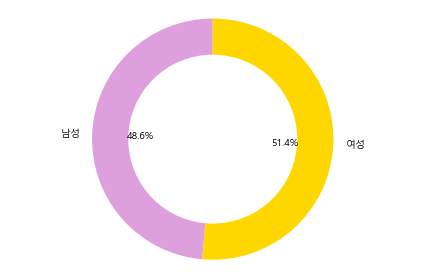

In [351]:
import matplotlib.pyplot as plt
labels = a['sex']
sizes = a['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','gold']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 나이별 소비금액 

In [353]:
b = area_udo.groupby('age').sum()['use_amount']
b = pd.DataFrame(b)
b = b.reset_index().rename({'index':'age'})

b

,age,use_amount
0,10,215.6100
1,20,28326.4452
2,30,24665.5032
3,40,20491.0060
4,50,16096.8405
5,60,5350.0450
6,70,1224.7300


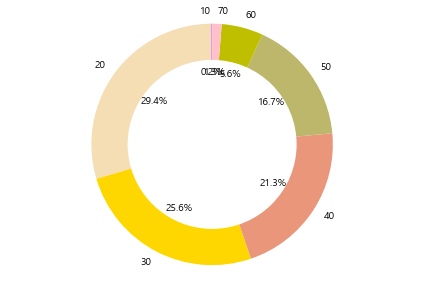

In [354]:
import matplotlib.pyplot as plt
labels = b['age']
sizes = b['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','wheat','gold','darksalmon','darkkhaki','y','pink']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 월별 소비금액

In [355]:
c = area_udo.groupby('month').sum()['use_amount']
c = pd.DataFrame(c)
c = c.reset_index().rename({'index':'month'})
c

,month,use_amount
0,201905,21381.5577
1,201906,21616.0900
2,201907,22906.5350
3,201908,30465.9972


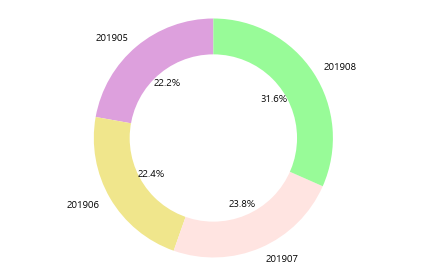

In [356]:
import matplotlib.pyplot as plt
labels = c['month']
sizes = c['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','khaki','mistyrose','palegreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### user type별 소비금액

In [357]:
d = area_udo.groupby('user_type').sum()['use_amount']
d = pd.DataFrame(d)
d = d.reset_index().rename({'index':'user_type'})
d

,user_type,use_amount
0,내국인,88471.1299
1,제주도민,7899.0500


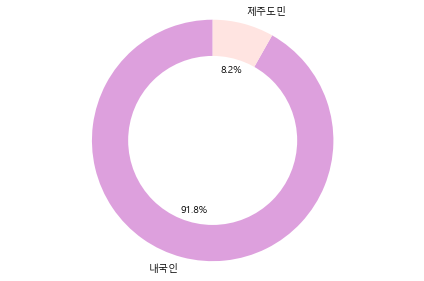

In [358]:
import matplotlib.pyplot as plt
labels = d['user_type']
sizes = d['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
colors = ['plum','mistyrose']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### 업종별

In [359]:
g = area_udo.groupby('biz_type').sum()['use_amount']
g = pd.DataFrame(g)
g = g.reset_index().rename({'index':'biz_type'})
g = g.sort_values(by ='use_amount',ascending = False)
h =g.iloc[0:5]
h

,biz_type,use_amount
8,한식 음식점업,54113.0938
3,서양식 음식점업,14040.5730
6,중식 음식점업,9335.1500
1,비알콜 음료점업,8049.3951
2,빵 및 과자류 소매업,6396.8000


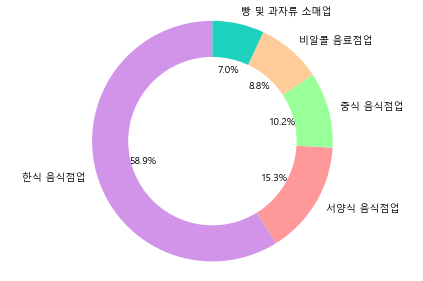

In [360]:
import matplotlib.pyplot as plt
labels = h['biz_type']
sizes = h['use_amount']
# colors = ['#ffcc99','#1cd2bd','#d29400','#d294e8']
# colors = ['lightsalmon','peru','darksalmon','gold','y','pink']
colors = ['#d294e8','#ff9999','#99ff99','#ffcc99','#1cd2bd','#d29400','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()